# Transform Data

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('house_price4.csv')

Xử lý Diện tích, Mặt tiền, Đường vào, Số tầng, Số phòng ngủ, Số toilet tách lấy số

In [98]:
def format_data():
    cols = ['Diện tích', 'Mặt tiền', 'Đường vào',
            'Số tầng', 'Số phòng ngủ', 'Số toilet']
    for 
    data[column] = data[column].str.split(expand=True)[0].astype('float')

cols = ['Diện tích', 'Mặt tiền', 'Đường vào',
        'Số tầng', 'Số phòng ngủ', 'Số toilet']
for col in cols:
    transform(col)


Xử lý địa chỉ: tách chỉ lấy quận,huyện


In [99]:
districs = ['hoàng mai', 'long biên', 'thanh xuân', 'bắc từ liêm', 'ba đình', 'cầu giấy', 'đống đa', 'hai bà trưng', 'hoàn kiếm',
            'hà đông', 'tây hồ', 'nam từ liêm', 'đan phượng', 'gia lâm', 'đông anh', 'chương mỹ', 'hoài đức', 'ba vì', 'mỹ đức',
            'phúc thọ', 'thạch thất', 'quốc oai', 'thanh trì', 'thường tín', 'thanh oai', 'phú xuyên', 'mê linh', 'sóc sơn', 'ứng hòa', 'sơn tây']


def handle_address(address):
    distric = address.lower().split(',')
    if (len(distric) > 2):
        dis = str(distric[-2]).strip()
        if 'quận' in dis:
            dis = dis.replace('quận', '').strip()
        if 'huyện' in dis:
            dis = dis.replace('huyện', '').strip()
        if dis not in districs:
            dis = np.nan
    else:
        dis = np.nan
    return dis


data['Địa chỉ'] = data['Địa chỉ'].map(handle_address)
data['Địa chỉ'].unique()



array(['thanh xuân', 'nam từ liêm', 'hoàng mai', 'hai bà trưng', 'tây hồ',
       'hà đông', 'thanh trì', 'đống đa', 'long biên', 'ba đình',
       'bắc từ liêm', 'hoài đức', 'cầu giấy', 'thanh oai', 'gia lâm',
       'chương mỹ', 'hoàn kiếm', 'quốc oai', 'đông anh', 'sơn tây',
       'đan phượng', nan, 'sóc sơn', 'thạch thất'], dtype=object)

Xử lý Giá

- Nếu giá theo tỷ thì giữ nguyên
- Nếu giá theo triệu/m² thì nhân với diện tích để ra giá theo tỷ
- Nếu mức giá ghi 'Thỏa thuận' thì gán giá trị NaN


In [100]:
def handle_price(row):
    price, unit = row['Mức giá'].split()
    if (unit != 'tỷ'):
        if (unit == 'triệu/m²'):
            price = float(price) * float(row['Diện tích']) / 1000
        else:
            price = np.nan
    else:
        price = float(price)
    return price


data['Mức giá'] = data.apply(handle_price, axis=1)

Xử lý Nội thất


In [101]:
def handle_furniture(furniture):
    luxurious = ['cao cấp', 'sang trọng', 'ngoại', 'châu âu']
    status = ''
    if pd.isna(furniture):
        status = 'đầy đủ'
    elif any(substring in str(furniture).lower() for substring in luxurious):
        status = 'cao cấp'
    else:
        status = 'đầy đủ'
    return status


data['Nội thất'] = data['Nội thất'].map(handle_furniture)


Xử lý hồ sơ


In [102]:
data.drop(['Pháp lý'], axis=1, inplace=True)

# Handle Missing Data


c:\Users\pqhuy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '0.080032'),
 Text(0, 0, '0'),
 Text(0, 0, '0.360144'),
 Text(0, 0, '32.9732'),
 Text(0, 0, '42.6971'),
 Text(0, 0, '79.6319'),
 Text(0, 0, '87.6551'),
 Text(0, 0, '9.96399'),
 Text(0, 0, '26.5706'),
 Text(0, 0, '0'),
 Text(0, 0, '16.0864')]

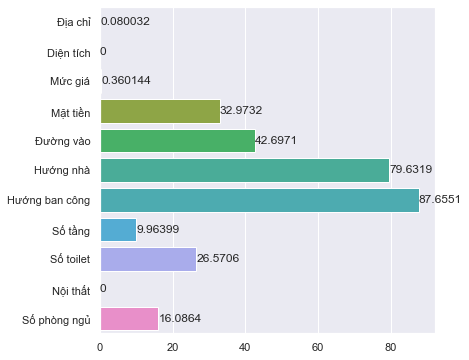

In [103]:
import seaborn as sns
sns.set(rc={'figure.figsize': (6, 6)})

nan_data = pd.Series(data.isnull().sum() / data.isnull().count()) * 100
ax = sns.barplot(nan_data, nan_data.index, )
ax.bar_label(ax.containers[0])
 

In [104]:
data.drop(['Hướng nhà', 'Hướng ban công'], axis=1, inplace=True)


Drop những hàng có chứa 'Mức giá' và 'Số tầng' giá trị Nan

In [105]:
data.dropna(subset=['Địa chỉ', 'Mức giá', 'Số tầng'], inplace=True, axis=0)

Fillna 'Mặt tiền' và 'Đường vào' bằng mean


In [106]:
data['Đường vào'].describe()

count    2772.000000
mean        4.036328
std         2.950425
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        50.000000
Name: Đường vào, dtype: float64

In [107]:
data['Mặt tiền'].fillna(data['Mặt tiền'].mean(), inplace=True)
data['Đường vào'].fillna(data['Đường vào'].mean(), inplace=True)

Fillna 'Số phòng ngủ' và 'Số toilet'
- Lấy diện tích nhân sô tầng chia số phòng để tính diện tích trung bình 1 phòng
- Tính giá trị NaN bằng diện tích nhân số tầng chia diện tích trung bình 1 phòng

In [108]:
# Fill NaN 'Số phòng ngủ'
area_bedrooom = (data['Diện tích'] * data['Số tầng'] / data['Số phòng ngủ']).mean()
def fillna_bedroom(row):
    if (pd.isna(row['Số phòng ngủ'])):
        row['Số phòng ngủ'] = int(row['Diện tích'] * row['Số tầng']/ area_bedrooom)
    return row['Số phòng ngủ']

data['Số phòng ngủ'] = data.apply(fillna_bedroom, axis=1)

In [109]:
# Fill NaN 'Số toilet'
area_toilet = (data['Diện tích'] * data['Số tầng'] / data['Số toilet']).mean()

def fillna_toilet(row):
    if (pd.isna(row['Số toilet'])):
        row['Số toilet'] = int(row['Diện tích']  * row['Số tầng'] / area_toilet)
    return row['Số toilet']

data['Số toilet'] = data.apply(fillna_toilet, axis=1)


- Hướng nhà, hướng ban công quá nhiều giá trị NAN nên bỏ 2 cột đi
data.drop(['Hướng nhà', 'Hướng ban công'], axis=1, inplace=True)
data.head()

c:\Users\pqhuy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

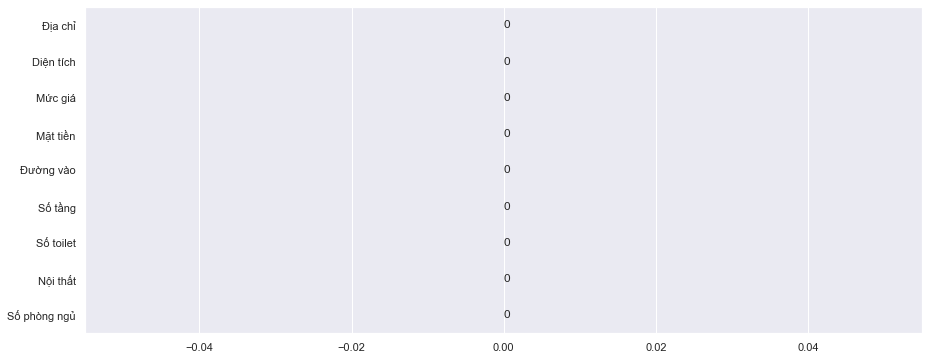

In [110]:
import seaborn as sns
sns.set(rc={'figure.figsize': (15, 6)})

nan_data = pd.Series(data.isnull().sum() / data.isnull().count()) * 100
ax = sns.barplot(nan_data, nan_data.index, )
ax.bar_label(ax.containers[0])


In [111]:
data

,Địa chỉ,Diện tích,Mức giá,Mặt tiền,Đường vào,Số tầng,Số toilet,Nội thất,Số phòng ngủ
0,thanh xuân,39.0,8.90,3.200000,8.000000,7.0,7.0,đầy đủ,5.0
1,thanh xuân,56.6,4.80,3.000000,3.000000,4.0,3.0,đầy đủ,4.0
2,nam từ liêm,33.0,3.30,5.000000,4.036328,2.0,2.0,đầy đủ,2.0
3,hoàng mai,32.0,3.85,4.410702,4.036328,5.0,3.0,đầy đủ,3.0
4,hai bà trưng,34.0,5.40,3.400000,4.036328,5.0,4.0,đầy đủ,3.0
...,...,...,...,...,...,...,...,...,...
4993,hà đông,30.0,2.80,5.000000,2.500000,2.0,2.0,đầy đủ,2.0
4994,hà đông,65.0,6.85,4.000000,4.036328,3.0,3.0,đầy đủ,4.0
4995,hà đông,48.0,6.30,4.000000,8.000000,4.0,4.0,đầy đủ,4.0
4996,hà đông,36.0,2.30,4.410702,4.036328,4.0,2.0,đầy đủ,5.0


# Handle Outlier Data 

In [79]:
data.dropna(subset=['Mặt tiền', 'Đường vào'], inplace=True, axis=0)


In [112]:
data_copy = data.copy()

In [81]:
data = data_copy

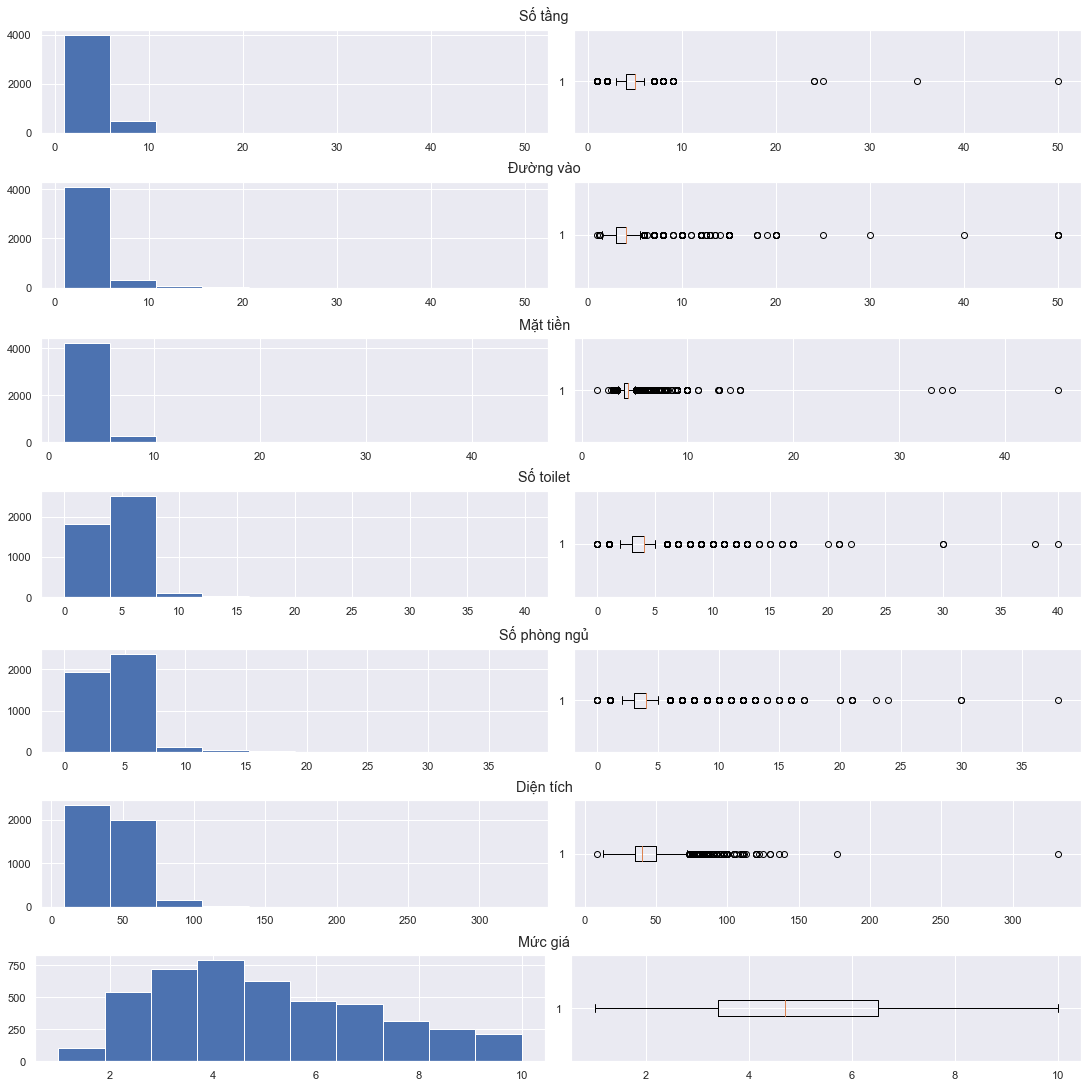

In [114]:

import matplotlib.pyplot as plt
def plot_boxplot():
    col = ['Số tầng', 'Đường vào', 'Mặt tiền', 'Số toilet',
        'Số phòng ngủ', 'Diện tích', 'Mức giá']
    fig = plt.figure(figsize=(15, 15), constrained_layout=True)

    subfigs = fig.subfigures(nrows=7, ncols=1)

    for row, subfig in enumerate(subfigs):
        subfig.suptitle(col[row])

        axes1, axes2 = subfig.subplots(nrows=1, ncols=2)
        axes1.hist(data[col[row]])
        axes2.boxplot(data[col[row]], vert=False)   

plot_boxplot()

In [115]:
# col = ['Diện tích', 'Mức giá', 'Số tầng',
#        'Số phòng ngủ', 'Số toilet', 'Mặt tiền', 'Đường vào']
from functools import reduce
from operator import or_ as union

col = ['Số tầng','Mặt tiền', 'Đường vào', 'Số toilet', 'Số phòng ngủ', 'Diện tích']
outlier_of_col = []
def drop_outliers(df, field_names):
    for field_name in field_names:
        Q1 = df[field_name].quantile(0.25)
        Q3 = df[field_name].quantile(0.75)
        iqr = Q3 - Q1
        upper_iqr = Q3 + 1.5 * iqr
        lower_iqr = Q1 - 1.5 * iqr
        
        df_outlier_upper = df[df[field_name] > upper_iqr]
        df_outlier_lower = df[df[field_name] < lower_iqr]
        df_outlier = pd.concat([df_outlier_lower, df_outlier_upper])
        # outlier_of_col.append(df_outlier.index)
        df.drop(df_outlier.index, inplace=True)
        # print(df.shape)

drop_outliers(data, col)


# def idx_union(mylist):
#     idx = reduce(union, (index for index in mylist))
#     return idx


# bar = idx_union(outlier_of_col)
# # drop_outliers(data, ['Số tầng'])
# # drop_outliers(data, ['Diện tích', 'Mức giá'])
# # drop_outliers(data, ['Mặt tiền', 'Đường vào'])
# data.drop(bar, inplace=True)
# len(bar)

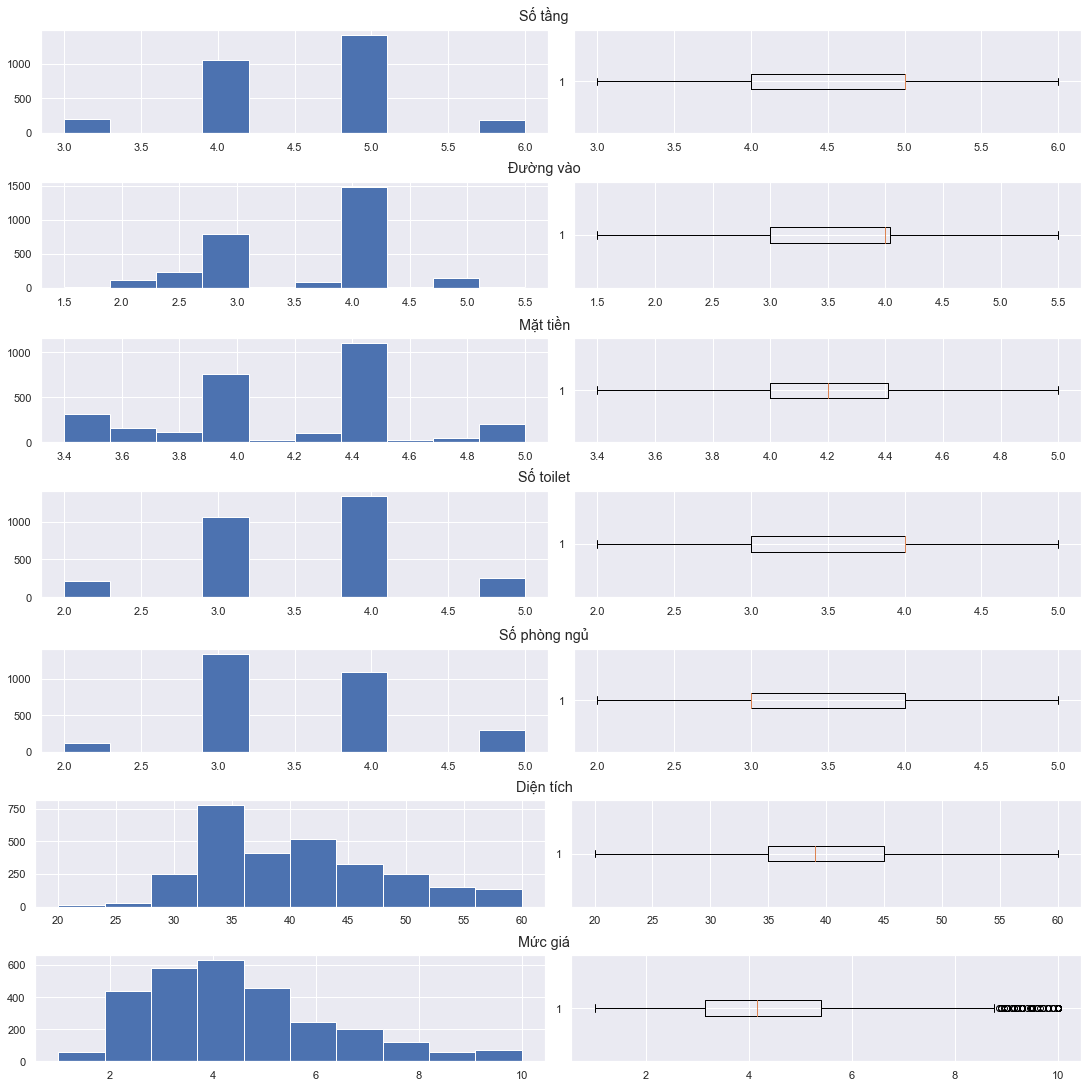

In [116]:
plot_boxplot()

In [117]:
data.shape

(2864, 9)

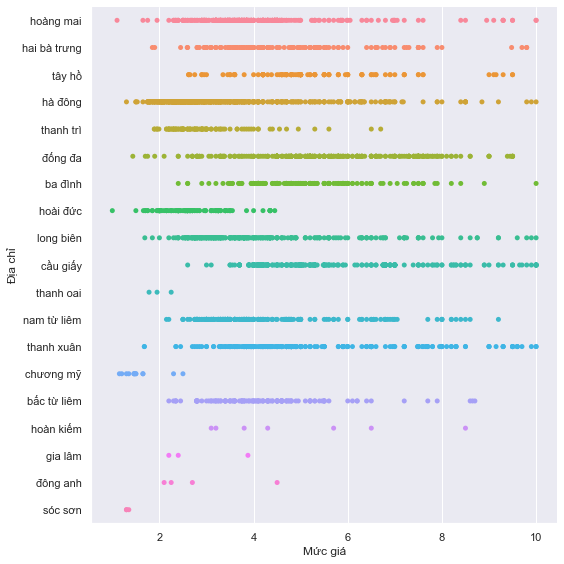

In [118]:

import seaborn as sns

sns.catplot(data=data, x="Mức giá", y="Địa chỉ", jitter=False, height=8)


In [122]:
frequency_add = data['Địa chỉ'].value_counts() / data.shape[0] * 100
id = frequency_add.index[frequency_add > 1]
data = data.loc[data['Địa chỉ'].isin(id)]


In [ ]:
data['Địa chỉ'].value_counts()


In [ ]:
data.loc[data['Địa chỉ'].isin(id)].reset_index(drop=True)

<AxesSubplot:xlabel='count', ylabel='Địa chỉ'>

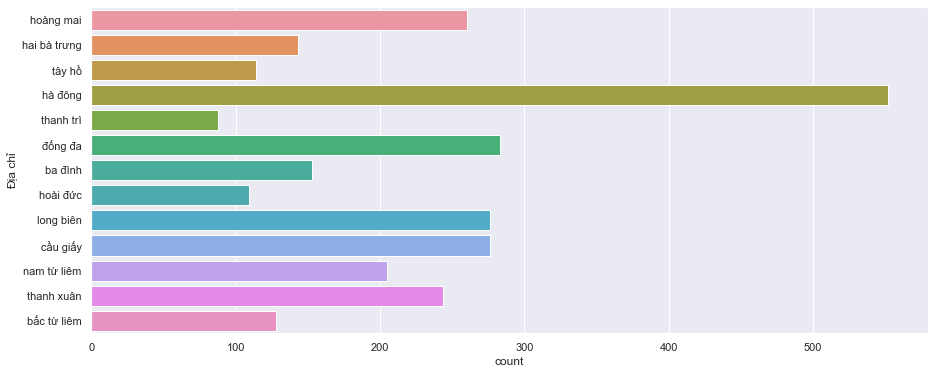

In [124]:

import seaborn as sns

sns.countplot(data=data, y="Địa chỉ")


In [ ]:
sns.catplot(data=data, x="Mức giá", y="Địa chỉ", kind="box")


In [123]:
data.reset_index(drop=True)

,Địa chỉ,Diện tích,Mức giá,Mặt tiền,Đường vào,Số tầng,Số toilet,Nội thất,Số phòng ngủ
0,hoàng mai,32.0,3.85,4.410702,4.036328,5.0,3.0,đầy đủ,3.0
1,hai bà trưng,34.0,5.40,3.400000,4.036328,5.0,4.0,đầy đủ,3.0
2,tây hồ,30.0,4.30,4.410702,3.000000,5.0,2.0,đầy đủ,3.0
3,hà đông,52.0,2.23,5.000000,3.000000,4.0,4.0,đầy đủ,3.0
4,hà đông,30.0,1.30,4.000000,3.000000,3.0,2.0,đầy đủ,3.0
...,...,...,...,...,...,...,...,...,...
2826,hà đông,34.0,2.98,3.500000,4.036328,5.0,4.0,đầy đủ,3.0
2827,hà đông,35.0,4.60,5.000000,4.036328,5.0,4.0,đầy đủ,3.0
2828,hà đông,38.0,3.10,4.500000,4.036328,4.0,3.0,đầy đủ,3.0
2829,hà đông,36.0,2.30,4.410702,4.036328,4.0,2.0,đầy đủ,5.0


# Feature engineering categorical data

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 3 to 4997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Địa chỉ       2831 non-null   object 
 1   Diện tích     2831 non-null   float64
 2   Mức giá       2831 non-null   float64
 3   Mặt tiền      2831 non-null   float64
 4   Đường vào     2831 non-null   float64
 5   Số tầng       2831 non-null   float64
 6   Số toilet     2831 non-null   float64
 7   Nội thất      2831 non-null   object 
 8   Số phòng ngủ  2831 non-null   float64
dtypes: float64(7), object(2)
memory usage: 221.2+ KB


In [ ]:
data['Diện tích'] = data['Diện tích'].astype('float')
data['Số tầng'] = data['Số tầng'].astype('int')


In [ ]:
data.info()

In [127]:
# data2 = data.loc[data['Địa chỉ'].isin(id)]
# data2 = data2.reset_index(drop=True)
data2 = data.copy().reset_index(drop=True)
data2

,Địa chỉ,Diện tích,Mức giá,Mặt tiền,Đường vào,Số tầng,Số toilet,Nội thất,Số phòng ngủ
0,hoàng mai,32.0,3.85,4.410702,4.036328,5.0,3.0,đầy đủ,3.0
1,hai bà trưng,34.0,5.40,3.400000,4.036328,5.0,4.0,đầy đủ,3.0
2,tây hồ,30.0,4.30,4.410702,3.000000,5.0,2.0,đầy đủ,3.0
3,hà đông,52.0,2.23,5.000000,3.000000,4.0,4.0,đầy đủ,3.0
4,hà đông,30.0,1.30,4.000000,3.000000,3.0,2.0,đầy đủ,3.0
...,...,...,...,...,...,...,...,...,...
2826,hà đông,34.0,2.98,3.500000,4.036328,5.0,4.0,đầy đủ,3.0
2827,hà đông,35.0,4.60,5.000000,4.036328,5.0,4.0,đầy đủ,3.0
2828,hà đông,38.0,3.10,4.500000,4.036328,4.0,3.0,đầy đủ,3.0
2829,hà đông,36.0,2.30,4.410702,4.036328,4.0,2.0,đầy đủ,5.0


In [ ]:
dummy_col = pd.get_dummies(data2[['Địa chỉ','Nội thất']])
dummy_col
data2.drop(['Địa chỉ', 'Nội thất'], axis=1, inplace=True)
data2 = pd.concat([data2, dummy_col],axis=1)

In [ ]:
data2.dropna(subset=['Mặt tiền', 'Đường vào'], inplace=True, axis=0)

In [ ]:
data2.info()

# Model

In [ ]:
from sklearn.model_selection import train_test_split
X = data2.drop(['Mức giá'], axis=1)
y = data2['Mức giá']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=12345)
print(f'Kích thước tập train {X_train.shape}')
print(f'Kích thước tập train {X_test.shape}')


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


def train_model(model):
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)  
    y_test_predict = model.predict(X_test)
    print('MAE of train set:', mean_absolute_error(y_train, y_train_predict))
    print('MSE of train set:', mean_squared_error(y_train, y_train_predict))

    print('MAE of test set:', mean_absolute_error(y_test, y_test_predict))
    print('MSE of test set:', mean_squared_error(y_test,y_test_predict))


In [ ]:
from sklearn.linear_model import LinearRegression

train_model(LinearRegression())

In [ ]:
from sklearn.ensemble import RandomForestRegressor

train_model(RandomForestRegressor())

In [ ]:
from xgboost import XGBRegressor

train_model(XGBRegressor())
